In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [6]:
# Load the data
file_path = 'Final project/RR_data.csv'
data = pd.read_csv(file_path)

# Ensure Date column is parsed correctly
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data = data.drop(columns=['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'])



In [7]:
# Selecting features and target variable
selected_columns = [
    'Consumer Price Index', 
    'Industrial Production: Total Index', 
    'Unemployment Rate', 
    'Employment Level', 
    'All Employees, Total Nonfarm', 
    'Labor Force Participation Rate', 
    'Personal Consumption Expenditures', 
    'Real Disposable Personal Income', 
    'Spot Crude Oil Price: West Texas Intermediate (WTI)', 
    'Motor Vehicle Retail Sales: Domestic Autos'
]
features = data[selected_columns]
target = data['SP500 RoR']

# Ensure there are no NaN values in the selected columns
features = features.dropna()
target = target.dropna()

# Confirm the shape of the dataset
print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")



Features shape: (612, 10)
Target shape: (612,)


In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [9]:
# Baseline Regression Model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)



Text(0.5, 1.0, 'Baseline Regression Model')

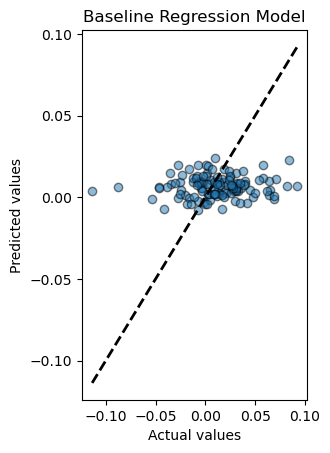

In [10]:
# Baseline Regression Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, baseline_predictions, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Baseline Regression Model')





In [11]:
# Calculating and printing the Mean Squared Error
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print(f"Baseline Model Mean Squared Error: {baseline_mse}")


Baseline Model Mean Squared Error: 0.0010681858505973585
